# Задание
Сгенерировать __N__ облаков (классов) с __M__ точками (объектами) в каждом. Построить классификатор используя *scikit-learn* который достигнет точности __R__ лежащей в интервале __(R1, R2)__.

----
Generate <b>N</b> clouds (classes) with <b>M</b> points (samples) in each cloud. Build classificator (SKLearn) which yields an accuracy <b>R</b> within the interval <b>(R1, R2)</b>. <br>



# Вариант №5 (6133-010402D)
Классов (N) = 4;


Элементов в классе (M) = 529;


Min (R1) = 0.637;


Max (R2) = 0.649;

Блок импорта

In [192]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sn

Блок инициализации

In [195]:
N = 4                     # Количество классов
M = 529                   # Количество объектов класса
R1, R2 = [0.637, 0.649]   # Диапазон точности
persent_test_data = 0.5

y = [0] * M               # Метки классов
for i in range(1, N):
  y += [i] * M 

Блок выполнения

In [196]:
acc = 0                     # Точность (accuracy)
shift = 0                   # Сдвиг облаков 
is_corr_acc = True          # Точность находится в нужных пределах?
clf = LogisticRegression()  # Объект линейной регрессии

# Изначально точность меньше R1 
# и с увеличением shift точность будет увеличиваться
while acc < R1:             
  shift += 0.01

  np.random.seed(30)        # Начальное условие

  # Создание N облаков с нормальным распределением
  clouds = []
  for i in range(N):              
    clouds.append(np.random.randn(M, 2) + shift * i)

  X = np.vstack(clouds)     # Вертикальная конкатенация: shape = (M*N, 2)

  data, labels = shuffle(X, y)    # Случайная перестановка X и y

  # Разбиение данных на тестовые и тренировочные
  test_size = int(len(data) * persent_test_data)
  Xtrain = data[:test_size]
  Ytrain = labels[:test_size]
  Xtest = data[test_size:]
  Ytest = labels[test_size:]

  clf.fit(Xtrain, Ytrain)   # Передача данных для обучения

  # классификация тестовой выборки
  predictions = clf.predict(Xtest)    
  # Вычисление точности
  acc = accuracy_score(Ytest, predictions)

# Если точность перешагнула заданный отрезок, то выводится сообщение
if acc > R2:
  print(f"Точность при заданных параметрах не вошла в отрезок [R1, R2].\n acc = {acc}")
  is_corr_acc = False

print(f"acc = {acc}")

acc = 0.6379962192816635


Блок визуализации

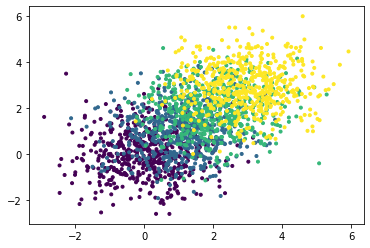

Correct accuracy = 0.6379962192816635


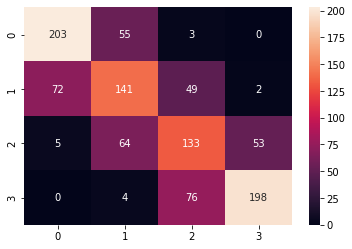

In [198]:
plt.scatter(X[:, 0], X[:, 1], c=y, marker=".")
plt.show()
if is_corr_acc:
  print(f"Correct accuracy = {acc}")
  conf_matrix = confusion_matrix(Ytest, predictions)
  sn.heatmap(conf_matrix, annot=True, fmt="d")
else:
  print(f"Incorrect accuracy = {acc}")